# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('previsao_de_renda.csv')

# Verificar as informações da base de dados
print(df.info())

# Explorar as primeiras linhas do dataset para entender as variáveis
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

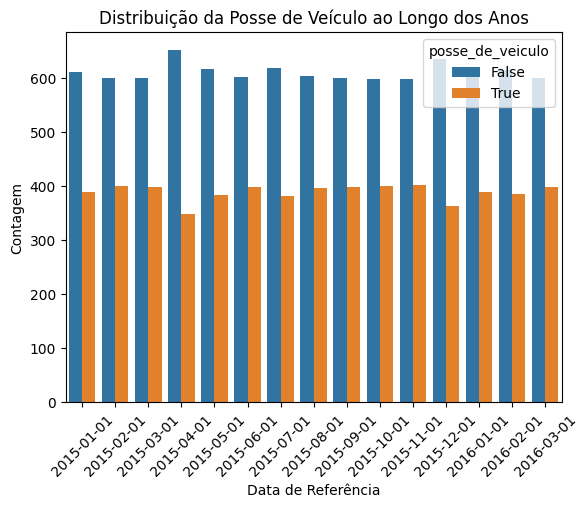

In [5]:
# Criar o gráfico para 'posse_de_veiculo' ao longo do tempo
sns.countplot(data=df, x='data_ref', hue='posse_de_veiculo')

# Ajustar o gráfico
plt.title('Distribuição da Posse de Veículo ao Longo dos Anos')
plt.xlabel('Data de Referência')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

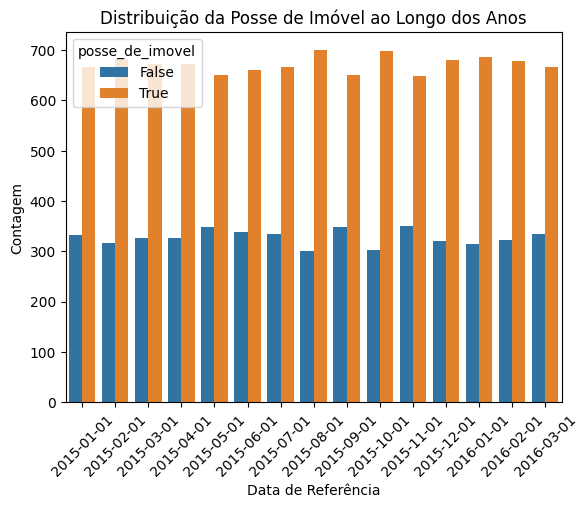

In [6]:
# Criar o gráfico para 'posse_de_imovel' ao longo do tempo
sns.countplot(data=df, x='data_ref', hue='posse_de_imovel')

# Ajustar o gráfico
plt.title('Distribuição da Posse de Imóvel ao Longo dos Anos')
plt.xlabel('Data de Referência')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

* Não há indícios de mudanças significativas ou padrões sazonais evidentes nessas duas variáveis qualitativas. A distribuição das posses de veículos e imóveis permanece estável ao longo do tempo, sugerindo que não houve alterações importantes nesses aspectos que precisem ser investigadas mais a fundo.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

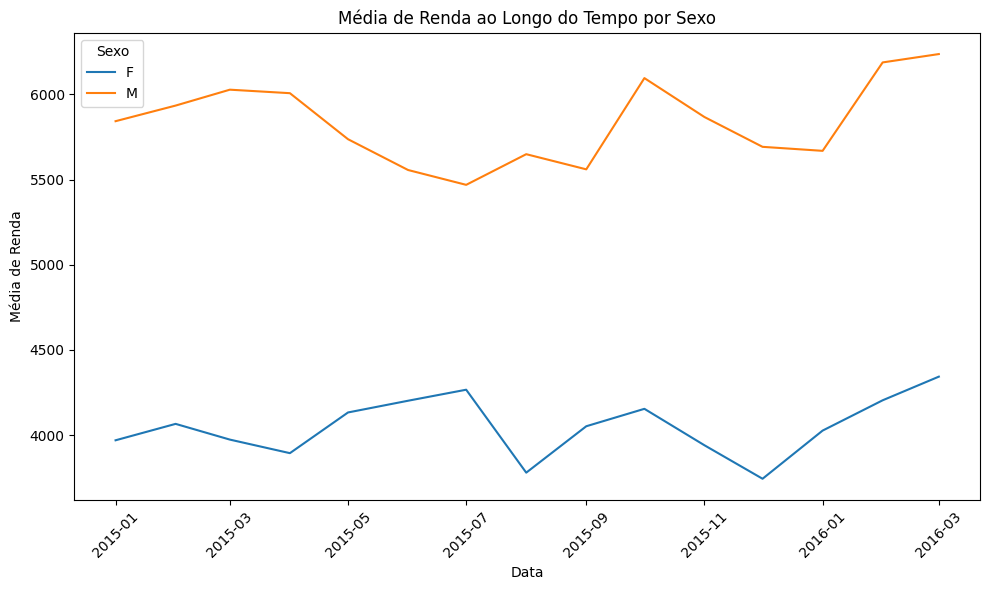

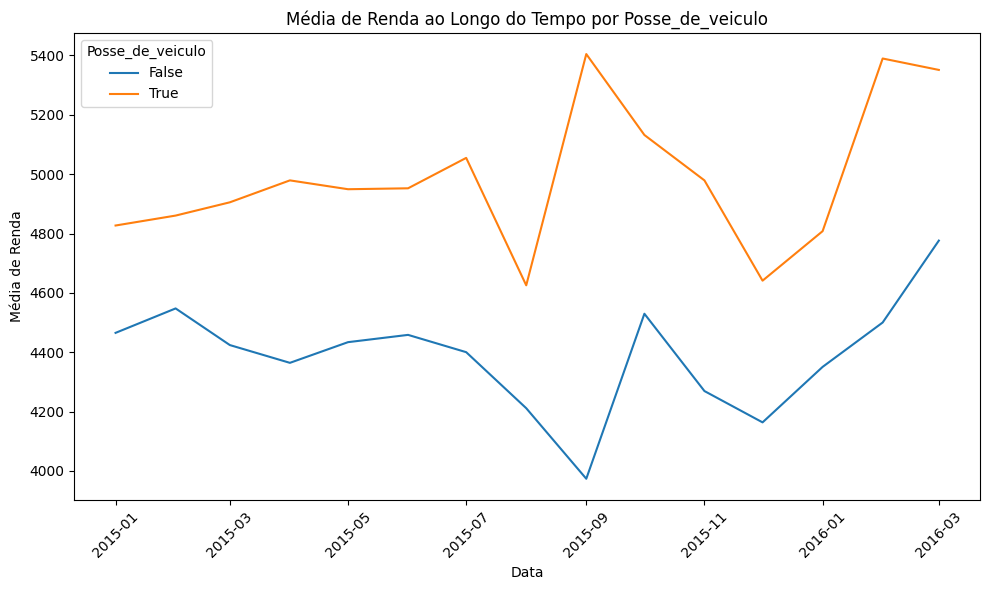

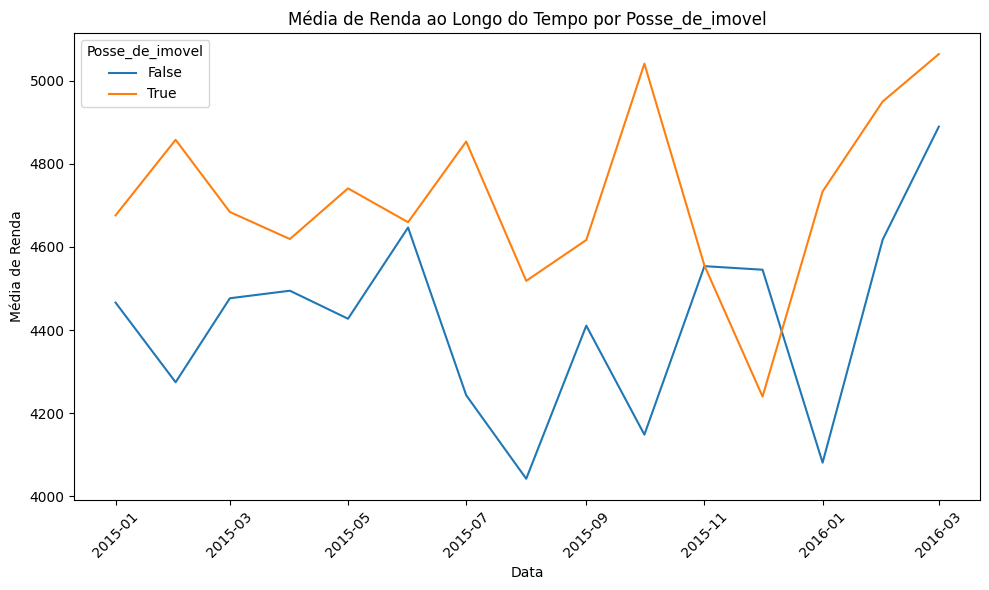

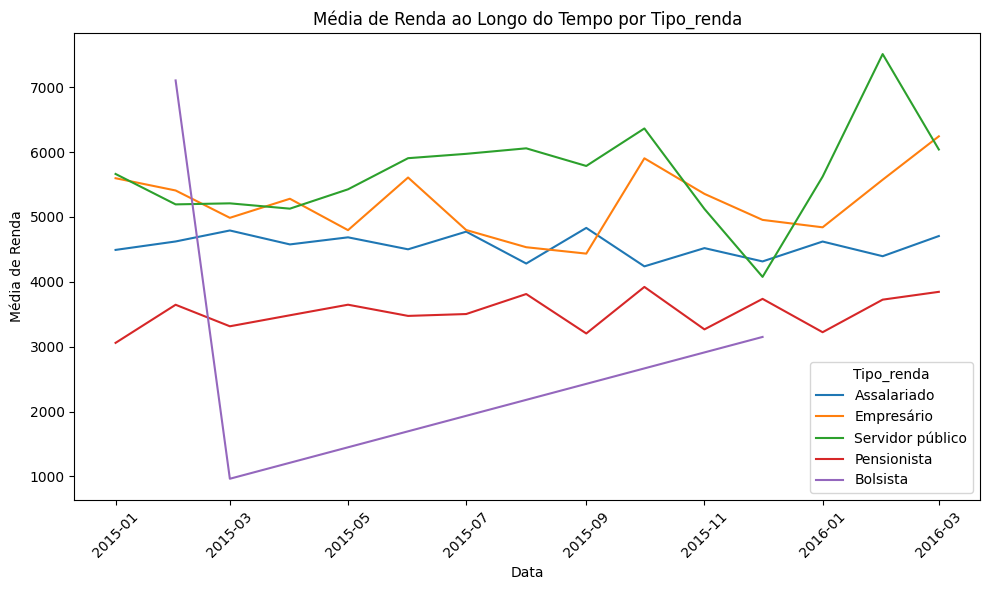

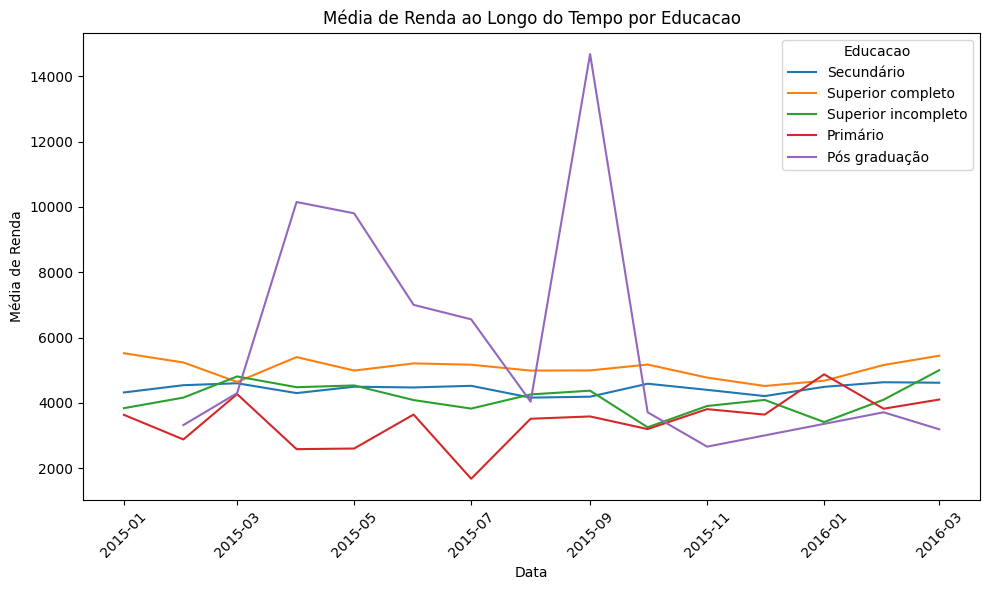

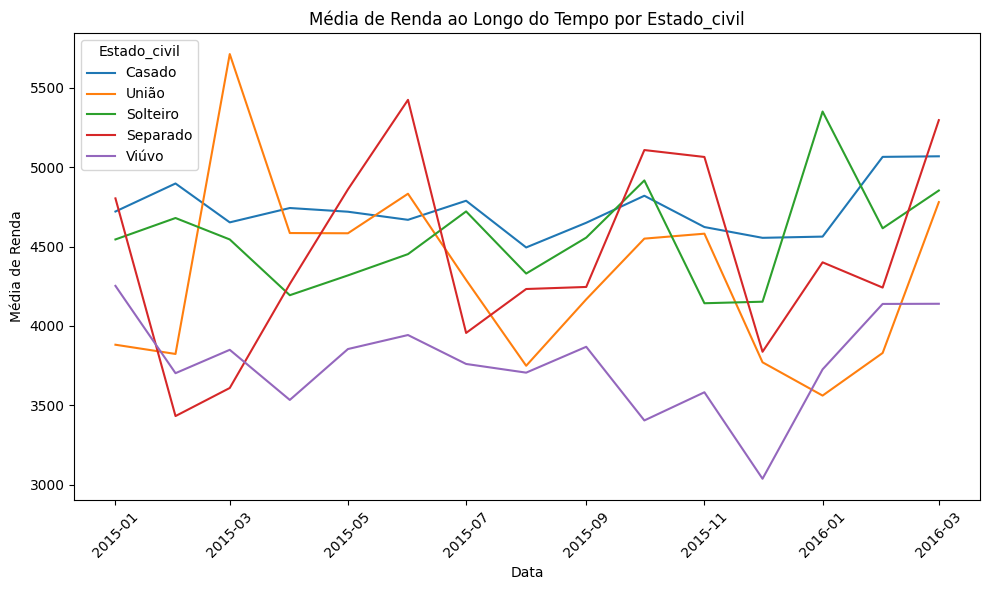

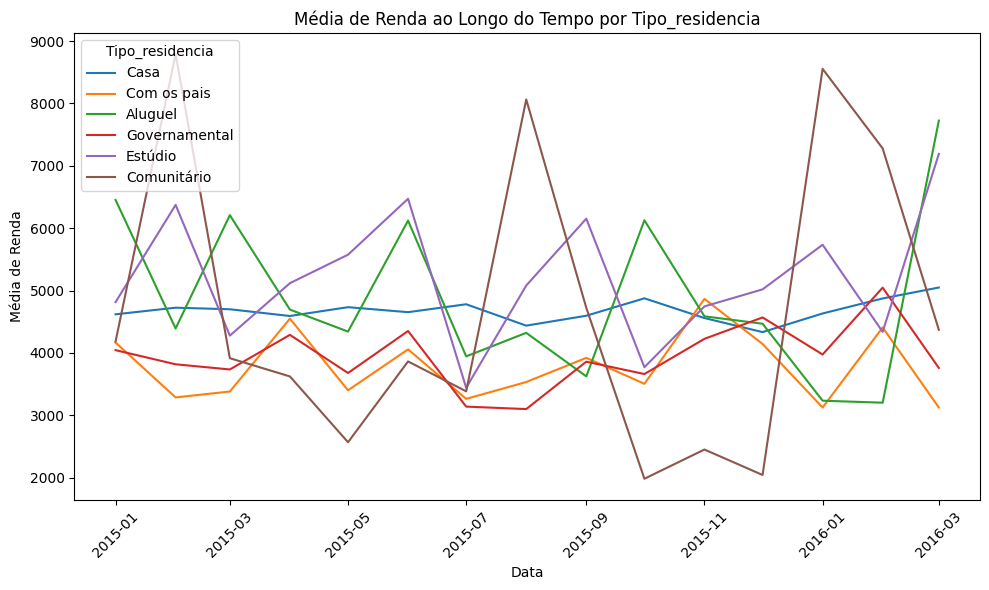

In [8]:
# Convertendo a coluna 'data_ref' para formato de data para análise temporal
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Função para criar gráficos de médias de renda ao longo do tempo por variável qualitativa
def grafico_media_por_variavel(variavel):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='data_ref', y='renda', hue=variavel, estimator='mean', errorbar=None)
    plt.title(f'Média de Renda ao Longo do Tempo por {variavel.capitalize()}')
    plt.ylabel('Média de Renda')
    plt.xlabel('Data')
    plt.xticks(rotation=45)
    plt.legend(title=variavel.capitalize())
    plt.tight_layout()
    plt.show()

# Criar gráficos para variáveis qualitativas selecionadas
qualitativas = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

# Gerar gráficos
for var in qualitativas:
    grafico_media_por_variavel(var)


* As médias de renda para cada nível das variáveis qualitativas são relativamente estáveis ao longo do tempo, com algumas diferenças claras entre os grupos, como esperado. Não há grandes variações temporais que justifiquem uma investigação mais profunda.

* As variáveis qualitativas discriminam bem diferentes grupos de renda e são estáveis, tornando-se boas candidatas para modelagem preditiva.